In [27]:
import pandas as pd

In [28]:
df = pd.read_csv('data/titanic/train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
df.Name.str.split(',', expand = True)[1]

0                                  Mr. Owen Harris
1       Mrs. John Bradley (Florence Briggs Thayer)
2                                      Miss. Laina
3               Mrs. Jacques Heath (Lily May Peel)
4                                Mr. William Henry
                          ...                     
886                                    Rev. Juozas
887                           Miss. Margaret Edith
888                 Miss. Catherine Helen "Carrie"
889                                Mr. Karl Howell
890                                    Mr. Patrick
Name: 1, Length: 891, dtype: object

In [29]:
df.Name.str.split(',', expand = True)[1].str.split('.', expand = True)[0]

0         Mr
1        Mrs
2       Miss
3        Mrs
4         Mr
       ...  
886      Rev
887     Miss
888     Miss
889       Mr
890       Mr
Name: 0, Length: 891, dtype: object

In [30]:
df['Sex2'] = df.Name.str.split(',', expand = True)[1].str.split('.', expand = True)[0]

In [31]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex2
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,Rev
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,Miss
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,Miss
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,Mr


In [32]:
df.Sex2 = df.Sex2.str.strip() # 앞뒤 공백 제거

In [33]:
df.Sex2 = df.Sex2.where(df.Sex2.isin(['Mr','Miss','Mrs','Master']), 'Unknown')

In [34]:
df.Sex2.value_counts()

Mr         517
Miss       182
Mrs        125
Master      40
Unknown     27
Name: Sex2, dtype: int64

In [35]:
age_mean = df.pivot_table(index = 'Sex2', aggfunc = 'mean', values = 'Age')

In [36]:
age_mean

,Age
Sex2,
Master,4.574167
Miss,21.773973
Mr,32.368090
Mrs,35.898148
Unknown,42.384615


In [37]:
df['Age'] = df['Age'].mask((df.Age.isnull()) & (df.Sex2 == 'Master'), 4.57)

In [38]:
df['Age'] = df['Age'].mask((df.Age.isnull()) & (df.Sex2 == 'Master'), 4.57)
df['Age'] = df['Age'].mask((df.Age.isnull()) & (df.Sex2 == 'Miss'), 21.77)
df['Age'] = df['Age'].mask((df.Age.isnull()) & (df.Sex2 == 'Mr'), 32.37)
df['Age'] = df['Age'].mask((df.Age.isnull()) & (df.Sex2 == 'Mrs'), 35.90)
df['Age'] = df['Age'].mask((df.Age.isnull()) & (df.Sex2 == 'Unknown'), 42.38)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Sex2         891 non-null    object 
dtypes: float64(2), int64(5), object(6)
memory usage: 90.6+ KB


In [40]:
# PassengerId --> 삭제
# Pclass --> 사용
# Name --> 삭제
# Sex --> 사용
# Age --> 사용
# SibSp, Parch --> 사용
# Ticket --> 삭제
# Fare --> 사용
# Cabin --> NaN이 너무 많아서 삭제
# Embarked --> 사용

# 불필요한 컬럼 삭제
df.drop(['PassengerId','Name', 'Ticket','Cabin'], axis = 1, inplace = True)

In [41]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2
0,0,3,male,22.00,1,0,7.2500,S,Mr
1,1,1,female,38.00,1,0,71.2833,C,Mrs
2,1,3,female,26.00,0,0,7.9250,S,Miss
3,1,1,female,35.00,1,0,53.1000,S,Mrs
4,0,3,male,35.00,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Unknown
887,1,1,female,19.00,0,0,30.0000,S,Miss
888,0,3,female,21.77,1,2,23.4500,S,Miss
889,1,1,male,26.00,0,0,30.0000,C,Mr


In [7]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,NaN,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [36]:
# NaN값 처리
# Age --> 평균값으로 치환
df.Age.fillna(df.Age.mean(), inplace = True)



In [42]:
# Embarked
#df.Embarked.value_counts()
#df.info()
# 최빈값으로 채워넣기 df.Embarked.fillna('S', inplace = True)
df.Embarked.fillna('N', inplace = True)

In [43]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Sex2
0,0,3,male,22.00,1,0,7.2500,S,Mr
1,1,1,female,38.00,1,0,71.2833,C,Mrs
2,1,3,female,26.00,0,0,7.9250,S,Miss
3,1,1,female,35.00,1,0,53.1000,S,Mrs
4,0,3,male,35.00,0,0,8.0500,S,Mr
...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.00,0,0,13.0000,S,Unknown
887,1,1,female,19.00,0,0,30.0000,S,Miss
888,0,3,female,21.77,1,2,23.4500,S,Miss
889,1,1,male,26.00,0,0,30.0000,C,Mr


In [44]:
df.Embarked.value_counts()

S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64

In [45]:
# 데이터 인코딩 (문자열 피쳐 --> 숫자형으로 변환)
#df.info()
# Sex --> 라벨인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df.Sex)
df.Sex = le.transform(df.Sex)
#le.fit_transform(df.Sex)

# fit()과 transform() 함수는 fit_transform()로 한 번에 수행 가능

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
 8   Sex2      891 non-null    object 
dtypes: float64(2), int32(1), int64(4), object(2)
memory usage: 59.3+ KB


In [47]:
# Embarked  --> 원핫인코딩
#from sklearn.preprocessing import OneHotEncoder
#ohe = OneHotEncoder()
#ohe.fit_transform(df.Embarked.values.reshape(-1, 1))
# OnehotEncoder 보다는 pandas.get_dummies() 함수를 활용하는 걸 추천
ohe_embarked = pd.get_dummies(df.Embarked)
df = pd.concat([df, ohe_embarked], axis = 1)
#df.Embarked

In [48]:
df.drop('Embarked', axis =1, inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Sex2      891 non-null    object 
 8   C         891 non-null    uint8  
 9   N         891 non-null    uint8  
 10  Q         891 non-null    uint8  
 11  S         891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), object(1), uint8(4)
memory usage: 55.8+ KB


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Sex2      891 non-null    object 
 8   C         891 non-null    uint8  
 9   N         891 non-null    uint8  
 10  Q         891 non-null    uint8  
 11  S         891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), object(1), uint8(4)
memory usage: 55.8+ KB


In [51]:
df.drop('Sex2', axis = 1, inplace = True) # Sex2 컬럼 삭제

In [52]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,C,N,Q,S
0,0,3,1,22.00,1,0,7.2500,0,0,0,1
1,1,1,0,38.00,1,0,71.2833,1,0,0,0
2,1,3,0,26.00,0,0,7.9250,0,0,0,1
3,1,1,0,35.00,1,0,53.1000,0,0,0,1
4,0,3,1,35.00,0,0,8.0500,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.00,0,0,13.0000,0,0,0,1
887,1,1,0,19.00,0,0,30.0000,0,0,0,1
888,0,3,0,21.77,1,2,23.4500,0,0,0,1
889,1,1,1,26.00,0,0,30.0000,1,0,0,0


In [53]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [54]:
# 학습용 데이터와 테스트용 데이터 분리
df_X = df.drop('Survived', axis = 1)
df_y = df['Survived']
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y)

In [55]:
# 1) 모델 객체 생성
dt = DecisionTreeClassifier()
# 2) 학습 
dt.fit(X_train, y_train)
# 3) 평가
print(dt.score(X_train, y_train))
print(dt.score(X_test, y_test))

0.9895209580838323
0.8026905829596412


In [56]:
# GridSearchCV() 활용
params = {
    'max_depth':[3,5,7], 
    'min_samples_split': [2, 5, 10]
}
grid_dt = GridSearchCV(dt, param_grid = params, cv = 5)
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 5, 7],
                         'min_samples_split': [2, 5, 10]})

In [57]:
print(grid_dt.score(X_train, y_train))
print(grid_dt.score(X_test, y_test))

0.8802395209580839
0.8295964125560538


In [58]:
grid_dt.best_params_

{'max_depth': 7, 'min_samples_split': 5}

In [59]:
grid_dt.best_score_

0.8114128605094827

In [60]:
grid_dt.cv_results_

{'mean_fit_time': array([0.00939612, 0.00559659, 0.0059979 , 0.00599661, 0.0087956 ,
        0.00499854, 0.00595813, 0.00459766, 0.00732336]),
 'std_fit_time': array([0.0032602 , 0.00233037, 0.00227996, 0.00209558, 0.00278401,
        0.00109446, 0.00147527, 0.00048988, 0.00242355]),
 'mean_score_time': array([0.00699558, 0.00339828, 0.0033989 , 0.00479555, 0.0047987 ,
        0.00419841, 0.00519357, 0.00499845, 0.00280128]),
 'std_score_time': array([0.00340492, 0.00101597, 0.0014945 , 0.00247868, 0.00171893,
        0.00213633, 0.00204313, 0.0029636 , 0.00075231]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_min_samples_split': masked_array(data=[2, 5, 10, 2, 5, 10, 2, 5, 10],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?

In [63]:
#grid_dt.best_estimator_.feature_importances_
ft_imp = pd.DataFrame({'feature': df_X.columns, 
              'importance': grid_dt.best_estimator_.feature_importances_
             })

<AxesSubplot:ylabel='feature'>

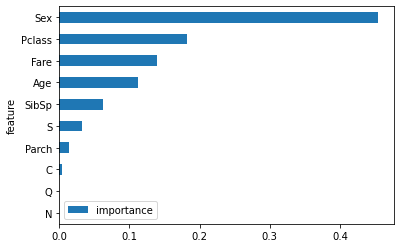

In [64]:
ft_imp.sort_values(by = 'importance').plot(x = 'feature', y = 'importance', kind = 'barh')

In [66]:
# 결정트리 시각화
import graphviz
# pip install graphviz
from sklearn import tree

In [67]:
# 시각화를 위한 간단한 결정 트리 생성
dt1 = DecisionTreeClassifier(max_depth = 2)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [68]:
data = tree.export_graphviz(dt1, 
                           feature_names = df_X.columns, 
                           class_names = ['Death', 'Survived'],
                           filled = True, 
                           rounded = True)
data

'digraph Tree {\nnode [shape=box, style="filled, rounded", color="black", fontname=helvetica] ;\nedge [fontname=helvetica] ;\n0 [label="Sex <= 0.5\\ngini = 0.471\\nsamples = 668\\nvalue = [414, 254]\\nclass = Death", fillcolor="#f5ceb2"] ;\n1 [label="Pclass <= 2.5\\ngini = 0.392\\nsamples = 235\\nvalue = [63, 172]\\nclass = Survived", fillcolor="#82c1ef"] ;\n0 -> 1 [labeldistance=2.5, labelangle=45, headlabel="True"] ;\n2 [label="gini = 0.102\\nsamples = 130\\nvalue = [7, 123]\\nclass = Survived", fillcolor="#44a3e6"] ;\n1 -> 2 ;\n3 [label="gini = 0.498\\nsamples = 105\\nvalue = [56, 49]\\nclass = Death", fillcolor="#fcefe6"] ;\n1 -> 3 ;\n4 [label="Age <= 5.785\\ngini = 0.307\\nsamples = 433\\nvalue = [351, 82]\\nclass = Death", fillcolor="#eb9e67"] ;\n0 -> 4 [labeldistance=2.5, labelangle=-45, headlabel="False"] ;\n5 [label="gini = 0.463\\nsamples = 22\\nvalue = [8, 14]\\nclass = Survived", fillcolor="#aad5f4"] ;\n4 -> 5 ;\n6 [label="gini = 0.276\\nsamples = 411\\nvalue = [343, 68]\\n

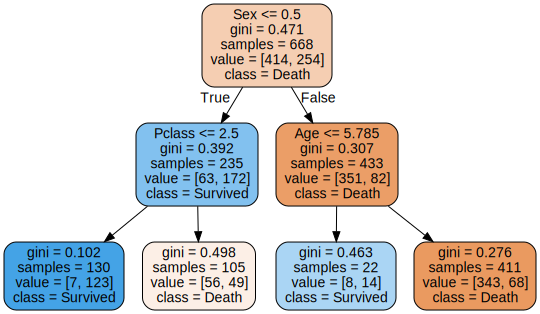

In [69]:
graph = graphviz.Source(data)
graph

In [251]:
graph.render('titanic_prediction')

'titanic_prediction.pdf'